### Image compression using K-means clustering algorithms

* Using K-means clustering, we will perform quantization of colours present in the image which will further help in  compressing the image.
* In a coloured image, each pixel is of size 3 bytes (RGB), where each colour can have intensity values from 0 to 255. 
* Following combinatorics, the total number of colours which can be represented are 256*256*256. 
* Practically, we are able to visualize only a few colours in an image. 
* Shown below is an image of 1280 x 720 pixels taking 1.71 MB in PNG format. PNG is a lossless compression technique for images. 

* **Our objective is to compress the image further using colour quantization, though the compression will be lossy.**



Ref: Image Compression using K-means Clustering : Colour Quantization by Abhijeet Kumar  March 8, 2017
     https://appliedmachinelearning.blog/2017/03/08/image-compression-using-k-means-clustering/

In [1]:
# importing libraries
import numpy as np
from sklearn import cluster, datasets
from scipy import misc
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from skimage import io

In [2]:
f = misc.face(gray=True)
f

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

In [3]:
f.shape

(768, 1024)

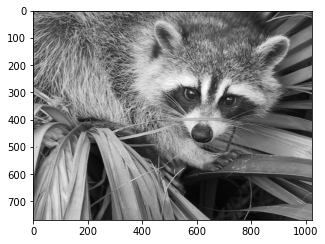

In [4]:
# Visualize the gray scale image
plt.figure(figsize = (5, 5))
plt.imshow(f, cmap=plt.cm.gray)
plt.show()

In [5]:
# Compressing the gray scale image into 5 clusters
rows = f.shape[0]
cols = f.shape[1]

In [6]:
# reshaping the image dimesnsions
image  = f.reshape(rows*cols, 1)

In [7]:
image.shape

(786432, 1)

In [8]:
image

array([[114],
       [130],
       [145],
       ...,
       [142],
       [141],
       [140]], dtype=uint8)

In [9]:
# training the model
kmeans = KMeans(n_clusters = 5)
kmeans.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
clusters = np.asarray(kmeans.cluster_centers_)
labels  = np.asarray(kmeans.labels_)

In [11]:
# five center points for five cluster
clusters

array([[153.24120581],
       [ 73.91549783],
       [113.57006678],
       [194.79152399],
       [ 27.11166441]])

In [12]:
# all points assigned to some cluster
labels.shape

(786432,)

In [13]:
labels

array([2, 2, 0, ..., 0, 0, 0])

In [14]:
labels = labels.reshape(rows,cols); 

In [15]:
labels

array([[2, 2, 0, ..., 2, 2, 0],
       [1, 2, 2, ..., 2, 0, 0],
       [1, 1, 2, ..., 2, 0, 0],
       ...,
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0]])

In [16]:
np.save('codebook_raccon.npy', clusters)

In [17]:
plt.imsave('compressed_racoon_image.png', labels)

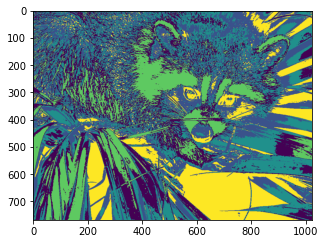

In [18]:
# show the compressed image
image = plt.imread('compressed_racoon_image.png')
plt.figure(figsize=(5,5))
plt.imshow(image)
plt.show()